El siguiente proyecto es sobre que tan efectivas fueron las campañas de Marketing para el Banco de Portugal y sus predicciones basados en los datos recolectados, haciendo partición de los datos y probando minimo 3 algoritmos (metodos), con el fin de ver con cual se consigue una mejor exactitud

In [2]:
##se importan las librerias
##imports
##numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#cross validation
from sklearn.model_selection import train_test_split

In [2]:
#data
markData = pd.read_csv('bank-additional-full.csv', header=1)
markData.head()

,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";""no"";""telephone"";""may"";""mon"";261;1;999;0;""nonexistent"";1.1;93.994;-36.4;4.857;5191;""no"""
0,"57;""services"";""married"";""high.school"";""unknown..."
1,"37;""services"";""married"";""high.school"";""no"";""ye..."
2,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
3,"56;""services"";""married"";""high.school"";""no"";""no..."
4,"45;""services"";""married"";""basic.9y"";""unknown"";""..."


In [3]:
#data
markData = pd.read_csv('bank-additional-full.csv', header=1)
markData.head()

ParserError: Error tokenizing data. C error: Expected 4 fields in line 9, saw 20


In [10]:
#data
markData = pd.read_csv('bank-additional-full.csv', delimiter=';')
markData.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
markData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [4]:
#data
newData = pd.read_csv('bank-additional-full.csv', delimiter=';')
newData.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
#data
markData = pd.read_csv('bank-additional-full.csv', delimiter=';')
markData.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
ageData = sns.factorplot('age', data=markData, hue='y', kind='count', aspect=1.5)

NameError: name 'sns' is not defined

In [7]:
import seaborn as sns

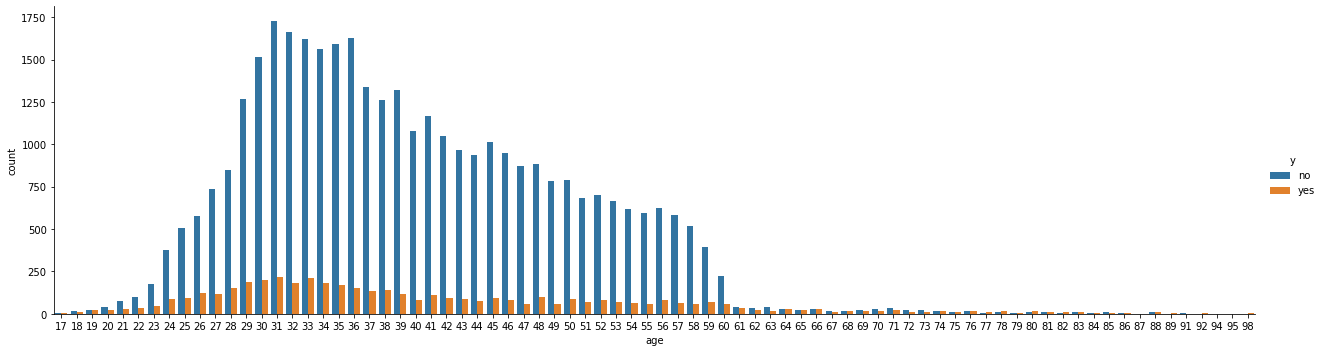

In [11]:
ageData = sns.factorplot('age', data=markData, hue='y', kind='count', aspect=3.5)

In [12]:
#Agrupación por edad
newData.groupby('age')['age'].count()

age
17      5
18     28
19     42
20     65
21    102
     ... 
91      2
92      4
94      1
95      1
98      2
Name: age, Length: 78, dtype: int64

In [13]:
#se va a trabajar con newData por lo que se revisan los valores vacios y se ven las columnas para asignar nombres
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [14]:
#Cambia el nombre de las columnas con el fin de entenderlas mejor
newData = newData.rename(columns={'default':'have_credit'})
newData = newData.rename(columns={'housing':'have_housing_loan'})
newData = newData.rename(columns={'loan':'have_loan'})
newData = newData.rename(columns={'contact':'comunication_type'})
newData = newData.rename(columns={'month':'last_contact_month'})
newData = newData.rename(columns={'poutcome':'last_result'})
newData = newData.rename(columns={'emp.var.rate':'empleo_var_rate'})
newData = newData.rename(columns={'cons.price.idx':'consumer_price_idx'})
newData = newData.rename(columns={'cons.conf.idx':'consumer_confidence_idx'})
newData = newData.rename(columns={'y':'suscribe_term_deposit'})

In [15]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age                        41188 non-null int64
job                        41188 non-null object
marital                    41188 non-null object
education                  41188 non-null object
have_credit                41188 non-null object
have_housing_loan          41188 non-null object
have_loan                  41188 non-null object
comunication_type          41188 non-null object
last_contact_month         41188 non-null object
day_of_week                41188 non-null object
duration                   41188 non-null int64
campaign                   41188 non-null int64
pdays                      41188 non-null int64
previous                   41188 non-null int64
last_result                41188 non-null object
empleo_var_rate            41188 non-null float64
consumer_price_idx         41188 non-null float64
consumer_confidence_idx    41188 non-null float64
euribor3m  

In [16]:
#se verifica si hay NA
newData.isna().sum()

age                        0
job                        0
marital                    0
education                  0
have_credit                0
have_housing_loan          0
have_loan                  0
comunication_type          0
last_contact_month         0
day_of_week                0
duration                   0
campaign                   0
pdays                      0
previous                   0
last_result                0
empleo_var_rate            0
consumer_price_idx         0
consumer_confidence_idx    0
euribor3m                  0
nr.employed                0
suscribe_term_deposit      0
dtype: int64

In [18]:
newData.dtypes

age                          int64
job                         object
marital                     object
education                   object
have_credit                 object
have_housing_loan           object
have_loan                   object
comunication_type           object
last_contact_month          object
day_of_week                 object
duration                     int64
campaign                     int64
pdays                        int64
previous                     int64
last_result                 object
empleo_var_rate            float64
consumer_price_idx         float64
consumer_confidence_idx    float64
euribor3m                  float64
nr.employed                float64
suscribe_term_deposit       object
dtype: object

In [19]:
newData.groupby('job')['job'].count()

job
admin.           10422
blue-collar       9254
entrepreneur      1456
housemaid         1060
management        2924
retired           1720
self-employed     1421
services          3969
student            875
technician        6743
unemployed        1014
unknown            330
Name: job, dtype: int64

In [20]:
#group marital
newData.groupby('marital')['marital'].count()

marital
divorced     4612
married     24928
single      11568
unknown        80
Name: marital, dtype: int64

In [22]:
#group education
newData.groupby('education')['education'].count()

education
basic.4y                4176
basic.6y                2292
basic.9y                6045
high.school             9515
illiterate                18
professional.course     5243
university.degree      12168
unknown                 1731
Name: education, dtype: int64

In [24]:
#group have credit
newData.groupby('have_credit')['have_credit'].count()

have_credit
no         32588
unknown     8597
yes            3
Name: have_credit, dtype: int64

In [26]:
#group suscribe deposit
newData.groupby('suscribe_term_deposit')['suscribe_term_deposit'].count()

suscribe_term_deposit
no     36548
yes     4640
Name: suscribe_term_deposit, dtype: int64

In [27]:
#Cambio a categoria las variables necesarias
newData['job'] = newData['job'].astype('category')
newData['marital'] = newData['marital'].astype('category')
newData['education'] = newData['education'].astype('category')
newData['have_credit'] = newData['have_credit'].astype('category')
newData['have_housing_loan'] = newData['have_housing_loan'].astype('category')
newData['have_loan'] = newData['have_loan'].astype('category')
newData['comunication_type'] = newData['comunication_type'].astype('category')
newData['last_contact_month'] = newData['last_contact_month'].astype('category')
newData['day_of_week'] = newData['day_of_week'].astype('category')
newData['last_result'] = newData['last_result'].astype('category')
newData['suscribe_term_deposit'] = newData['suscribe_term_deposit'].astype('category')

In [28]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age                        41188 non-null int64
job                        41188 non-null category
marital                    41188 non-null category
education                  41188 non-null category
have_credit                41188 non-null category
have_housing_loan          41188 non-null category
have_loan                  41188 non-null category
comunication_type          41188 non-null category
last_contact_month         41188 non-null category
day_of_week                41188 non-null category
duration                   41188 non-null int64
campaign                   41188 non-null int64
pdays                      41188 non-null int64
previous                   41188 non-null int64
last_result                41188 non-null category
empleo_var_rate            41188 non-null float64
consumer_price_idx         41188 non-null float64
consumer_confidence_idx    41188 non-null

In [30]:
#group last_contact_month 
newData.groupby('last_contact_month')['last_contact_month'].count()

last_contact_month
apr     2632
aug     6178
dec      182
jul     7174
jun     5318
mar      546
may    13769
nov     4101
oct      718
sep      570
Name: last_contact_month, dtype: int64

In [31]:
#group day of week
newData.groupby('day_of_week')['day_of_week'].count()

day_of_week
fri    7827
mon    8514
thu    8623
tue    8090
wed    8134
Name: day_of_week, dtype: int64

In [32]:
#group last result
newData.groupby('last_result')['last_result'].count()


last_result
failure         4252
nonexistent    35563
success         1373
Name: last_result, dtype: int64

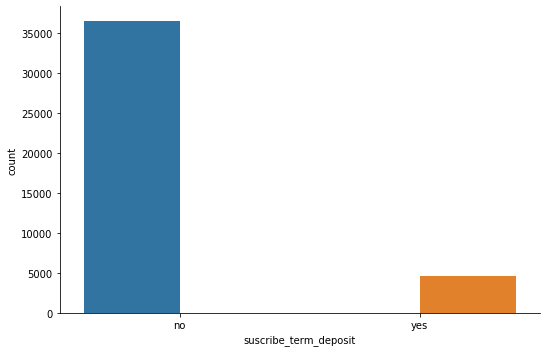

In [126]:
depositData = sns.factorplot('suscribe_term_deposit', data=newData, hue='suscribe_term_deposit', kind='count', aspect=1.5)

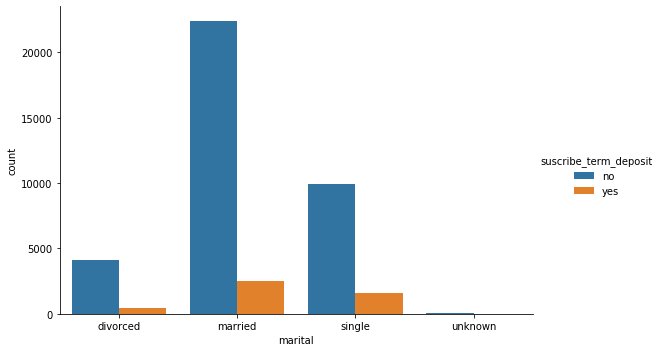

In [34]:
##Visualización grafica de datos
maritalData = sns.factorplot('marital', data=newData, hue='suscribe_term_deposit', kind='count', aspect=1.5)

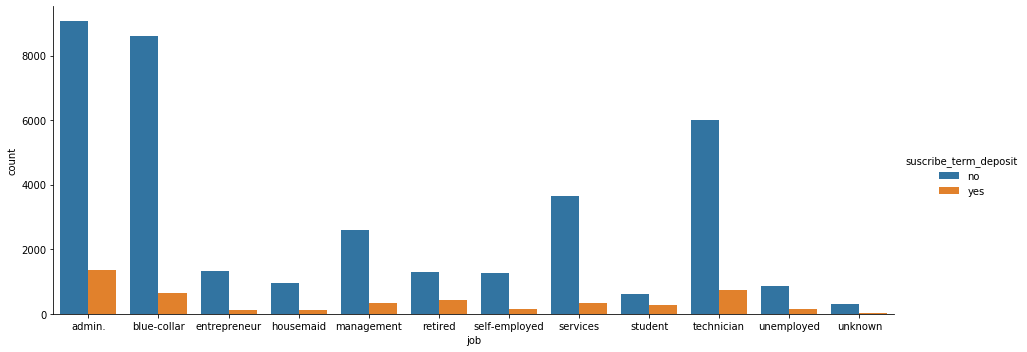

In [37]:
#Por tipo de trabajo
jobData = sns.factorplot('job', data=newData, hue='suscribe_term_deposit', kind='count', aspect=2.5)

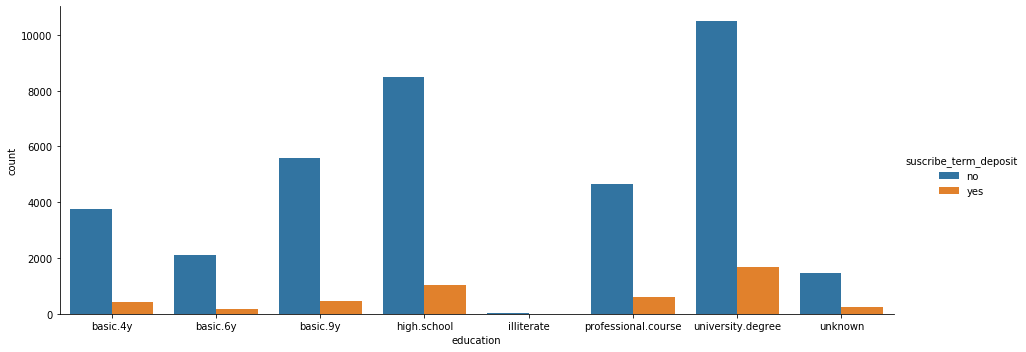

In [38]:
#Por Educación
jobData = sns.factorplot('education', data=newData, hue='suscribe_term_deposit', kind='count', aspect=2.5)


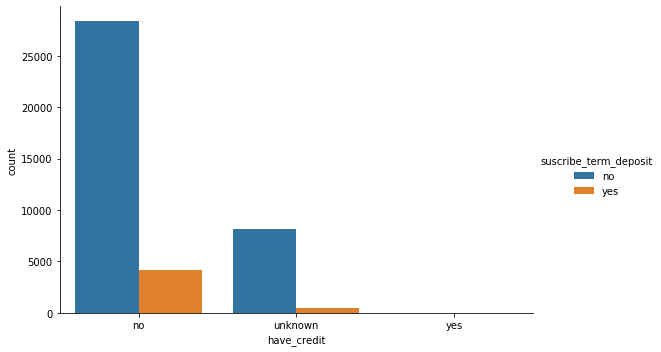

In [40]:
#Los que tienen credito
jobData = sns.factorplot('have_credit', data=newData, hue='suscribe_term_deposit', kind='count', aspect=1.5)


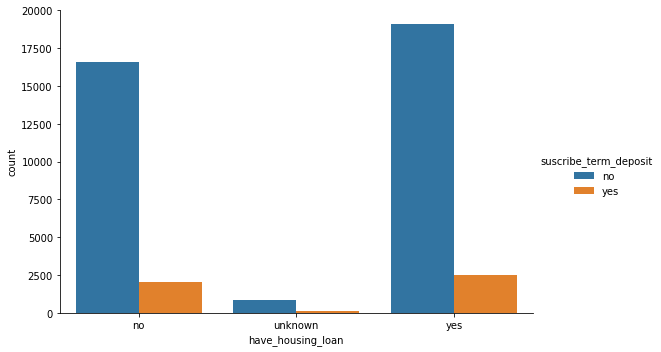

In [41]:
#Los que tienen credito de vivienda
jobData = sns.factorplot('have_housing_loan', data=newData, hue='suscribe_term_deposit', kind='count', aspect=1.5)


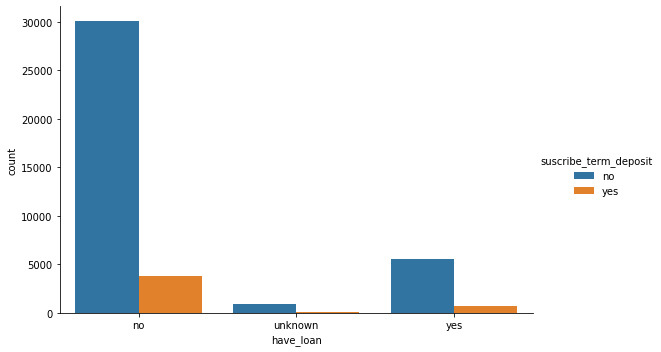

In [42]:
#Los que tienen prestamo personal
jobData = sns.factorplot('have_loan', data=newData, hue='suscribe_term_deposit', kind='count', aspect=1.5)


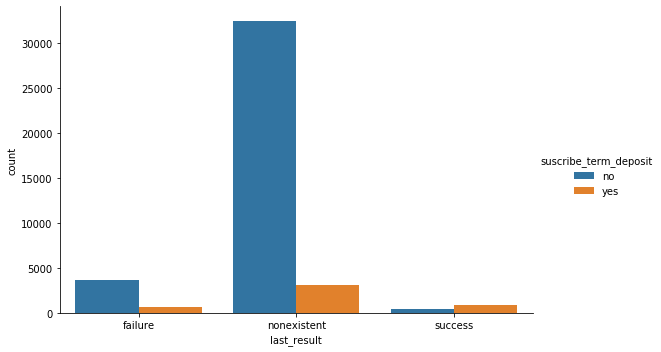

In [43]:
#Por último resultado del contacto
jobData = sns.factorplot('last_result', data=newData, hue='suscribe_term_deposit', kind='count', aspect=1.5)


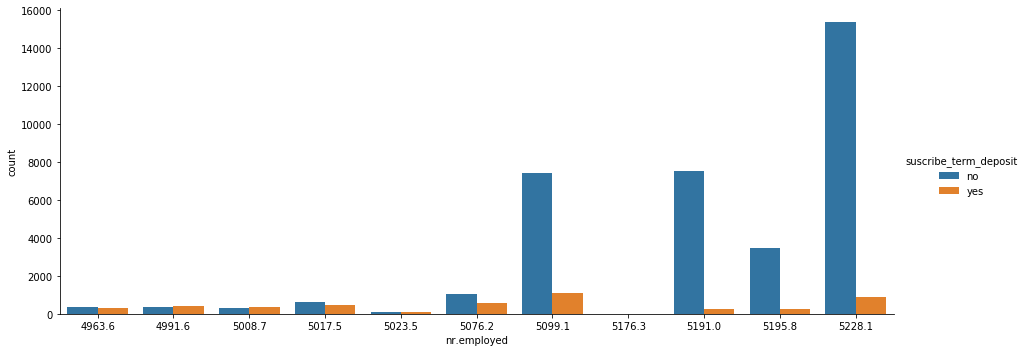

In [46]:
#Por nr de empleado
jobData = sns.factorplot('nr.employed', data=newData, hue='suscribe_term_deposit', kind='count', aspect=2.5)


In [47]:
#group nr.employee
newData.groupby('nr.employed')['nr.employed'].count()

nr.employed
4963.6      635
4991.6      773
5008.7      650
5017.5     1071
5023.5      172
5076.2     1663
5099.1     8534
5176.3       10
5191.0     7763
5195.8     3683
5228.1    16234
Name: nr.employed, dtype: int64

In [48]:
#se crea un nuevo Dataset con los cambios para trabajar dummy, con el fin de poder trabajar los datos con los algoritmos
dataDummy=newData.iloc[ : ,0:20]
dataDummy.head()

,age,job,marital,education,have_credit,have_housing_loan,have_loan,comunication_type,last_contact_month,day_of_week,duration,campaign,pdays,previous,last_result,empleo_var_rate,consumer_price_idx,consumer_confidence_idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [49]:
dataDummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
age                        41188 non-null int64
job                        41188 non-null category
marital                    41188 non-null category
education                  41188 non-null category
have_credit                41188 non-null category
have_housing_loan          41188 non-null category
have_loan                  41188 non-null category
comunication_type          41188 non-null category
last_contact_month         41188 non-null category
day_of_week                41188 non-null category
duration                   41188 non-null int64
campaign                   41188 non-null int64
pdays                      41188 non-null int64
previous                   41188 non-null int64
last_result                41188 non-null category
empleo_var_rate            41188 non-null float64
consumer_price_idx         41188 non-null float64
consumer_confidence_idx    41188 non-null

In [51]:
##se trabaja dummy con el nuevo data set
Dummydata = pd.get_dummies(dataDummy)
Dummydata.head()

,age,duration,campaign,pdays,previous,empleo_var_rate,consumer_price_idx,consumer_confidence_idx,euribor3m,nr.employed,...,last_contact_month_oct,last_contact_month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,last_result_failure,last_result_nonexistent,last_result_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [52]:
Dummydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
age                              41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
empleo_var_rate                  41188 non-null float64
consumer_price_idx               41188 non-null float64
consumer_confidence_idx          41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_self-employed

In [53]:
#agrego la variable dependiente
Dummydata["suscribe_term_deposit"] = newData["suscribe_term_deposit"]

In [54]:
Dummydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
age                              41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
empleo_var_rate                  41188 non-null float64
consumer_price_idx               41188 non-null float64
consumer_confidence_idx          41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_self-employed

In [55]:
Dummydata.head()

,age,duration,campaign,pdays,previous,empleo_var_rate,consumer_price_idx,consumer_confidence_idx,euribor3m,nr.employed,...,last_contact_month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,last_result_failure,last_result_nonexistent,last_result_success,suscribe_term_deposit
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,no
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,no
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,no
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,no
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,no


In [56]:
#Correlacion
corrDat = Dummydata.corr()
print(corrDat)

                              age  duration  campaign     pdays  previous  \
age                      1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration                -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign                 0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays                   -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous                 0.024365  0.020640 -0.079141 -0.587514  1.000000   
...                           ...       ...       ...       ...       ...   
day_of_week_tue          0.019137  0.004140 -0.025125 -0.007300  0.000090   
day_of_week_wed         -0.023671  0.014537 -0.021088  0.001021 -0.003929   
last_result_failure     -0.002537 -0.013311 -0.068890  0.006354  0.682608   
last_result_nonexistent -0.016376 -0.011665  0.087645  0.491353 -0.878776   
last_result_success      0.035626  0.044876 -0.050893 -0.950700  0.524045   

                         empleo_var_rate  consumer_price_idx  \
age        

In [57]:
#Covarianza
covMat = Dummydata.cov()
print(covMat)


                                age      duration   campaign         pdays  \
age                      108.602451     -2.339147   0.132603    -66.945400   
duration                  -2.339147  67225.728877 -51.494888  -2305.683015   
campaign                   0.132603    -51.494888   7.672975     27.224921   
pdays                    -66.945400  -2305.683015  27.224921  34935.687284   
previous                   0.125661      2.648520  -0.108494    -54.346448   
...                             ...           ...        ...           ...   
day_of_week_tue            0.079233      0.426427  -0.027650     -0.542099   
day_of_week_wed           -0.098203      1.500564  -0.023255      0.075938   
last_result_failure       -0.008044     -1.050134  -0.058062      0.361385   
last_result_nonexistent   -0.058602     -1.038576   0.083369     31.537194   
last_result_success        0.066646      2.088710  -0.025307    -31.898580   

                          previous  empleo_var_rate  consumer_p

In [58]:
#Segmentacion de variables independientes
features = Dummydata.iloc[:,0:63]
print('Summary of feature sample')
features.head()

Summary of feature sample


,age,duration,campaign,pdays,previous,empleo_var_rate,consumer_price_idx,consumer_confidence_idx,euribor3m,nr.employed,...,last_contact_month_oct,last_contact_month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,last_result_failure,last_result_nonexistent,last_result_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [59]:
#Variable dependiente
depVar = Dummydata['suscribe_term_deposit']


In [61]:
#Normalizacion del conjunto de datos
from sklearn import preprocessing
Normalfeatures = preprocessing.scale(features)
print(Normalfeatures)

[[ 1.53303429  0.01047142 -0.56592197 ... -0.3392905   0.39770593
  -0.1857    ]
 [ 1.62899323 -0.42150051 -0.56592197 ... -0.3392905   0.39770593
  -0.1857    ]
 [-0.29018564 -0.12451981 -0.56592197 ... -0.3392905   0.39770593
  -0.1857    ]
 ...
 [ 1.53303429 -0.26722482 -0.20490853 ... -0.3392905   0.39770593
  -0.1857    ]
 [ 0.38152696  0.70856893 -0.56592197 ... -0.3392905   0.39770593
  -0.1857    ]
 [ 3.26029527 -0.07438021  0.15610492 ...  2.94732687 -2.51442063
  -0.1857    ]]


In [62]:
RFC = RandomForestClassifier(random_state=101)

In [64]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
rfecv = RFECV(estimator = RFC, step = 1, cv=StratifiedKFold(10), scoring = 'accuracy')
rfecv.fit(features,depVar)


RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [65]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 1


In [66]:
rfecv.fit(Normalfeatures,depVar)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [67]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 1


Se continua sin aplicar la seleccion recursiva, debido al tiempo que se dura y no se aplicó correctamente

In [68]:
len(features)

41188

In [69]:
#Determina datos de entrenamiento y testeo
train = int(.70*len(features))
test = int(.30*len(features))
print(train, test)

28831 12356


In [70]:
#conjunto de datos de entrenamiento y testeo
Xtrain = features[:train]
Xtrain.head()

,age,duration,campaign,pdays,previous,empleo_var_rate,consumer_price_idx,consumer_confidence_idx,euribor3m,nr.employed,...,last_contact_month_oct,last_contact_month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,last_result_failure,last_result_nonexistent,last_result_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [71]:
Xtrain.shape


(28831, 63)

In [72]:
Xtest = features[-test:]
Xtest_count = len(Xtest.index)
print(Xtest.tail())

       age  duration  campaign  pdays  previous  empleo_var_rate  \
41183   73       334         1    999         0             -1.1   
41184   46       383         1    999         0             -1.1   
41185   56       189         2    999         0             -1.1   
41186   44       442         1    999         0             -1.1   
41187   74       239         3    999         1             -1.1   

       consumer_price_idx  consumer_confidence_idx  euribor3m  nr.employed  \
41183              94.767                    -50.8      1.028       4963.6   
41184              94.767                    -50.8      1.028       4963.6   
41185              94.767                    -50.8      1.028       4963.6   
41186              94.767                    -50.8      1.028       4963.6   
41187              94.767                    -50.8      1.028       4963.6   

       ...  last_contact_month_oct  last_contact_month_sep  day_of_week_fri  \
41183  ...                       0         

In [73]:
str(Xtest_count)

'12356'

In [74]:
#Variable dependiente, entrenamiento y testeo
ytrain = depVar[: train]
ytrain_count = len(ytrain.index)
print('The number of observations in the Y training set are:',str(ytrain_count))
ytrain.head()

The number of observations in the Y training set are: 28831


0    no
1    no
2    no
3    no
4    no
Name: suscribe_term_deposit, dtype: category
Categories (2, object): [no, yes]

In [75]:
ytest = depVar[-test:]
ytest_count = len(ytest.index)
print('The number of observations in the Y training set are:',str(ytest_count))
ytest.head()

The number of observations in the Y training set are: 12356


28832    no
28833    no
28834    no
28835    no
28836    no
Name: suscribe_term_deposit, dtype: category
Categories (2, object): [no, yes]

In [76]:
#Cross validation
Xtrain, Xtest, ytrain, ytest = train_test_split(Xtrain, ytrain)
Xtrain.shape, Xtest.shape

((21623, 63), (7208, 63))

In [77]:
#Modelo Random Forest
modelRF = RandomForestClassifier(max_depth=2, random_state=0)
modelRF.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [78]:
print(cross_val_score(modelRF,Xtrain,ytrain))


[0.94566474 0.94566474 0.94566474 0.94588344 0.94565217]


In [79]:
modelRF.score(Xtrain,ytrain)

0.9457059612449706

In [80]:
##modelo SVM
from sklearn import svm

modelSVM = svm.SVC ()
modelSVM.fit(Xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [81]:
print(cross_val_score(modelSVM,Xtrain,ytrain))

[0.94566474 0.94566474 0.9449711  0.94588344 0.94565217]


In [127]:
modelSVM.score(Xtrain,ytrain)

0.9457059612449706

In [82]:
#Modelo Decision tree Classifier
from sklearn import tree

modelDTC =tree.DecisionTreeClassifier()
modelDTC = modelDTC.fit(Xtrain,ytrain)

In [83]:
print(cross_val_score(modelDTC,Xtrain,ytrain))

[0.93294798 0.93780347 0.92901734 0.93640148 0.93732655]


In [84]:
modelDTC.score(Xtrain,ytrain)


1.0

In [85]:
#Predicciones con RF
predRF = modelRF.predict(Xtest)

In [86]:
accuracy_score(ytest,predRF)

0.9400665926748057

In [87]:
#Predicciones con SVM
predSVM = modelSVM.predict(Xtest)
accuracy_score(ytest,predSVM)

0.9402053274139844

In [88]:
#Predicciones con Decision tree Classifier
predDTC = modelDTC.predict(Xtest)
accuracy_score(ytest,predDTC)

0.9311875693673696

Predicciones con los modelos evaluados

In [91]:
predictions = modelRF.predict(Xtest)

In [92]:
print(predictions)

['no' 'no' 'no' ... 'no' 'no' 'no']


In [94]:
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'suscribe_term_deposit': Xtest, 'prediction': predictions})

ValueError: Shape of passed values is (63, 2), indices imply (7208, 2)

In [95]:
datapredict  = pd.DataFrame(predictions)

In [96]:
datapredict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 1 columns):
0    7208 non-null object
dtypes: object(1)
memory usage: 56.4+ KB


In [98]:
datapredict.head()

,0
0,no
1,no
2,no
3,no
4,no


In [102]:
print(datapredict)

       0
0     no
1     no
2     no
3     no
4     no
...   ..
7203  no
7204  no
7205  no
7206  no
7207  no

[7208 rows x 1 columns]


In [112]:
datapredict.describe()

,0
count,7208
unique,1
top,no
freq,7208


In [113]:
predictionDTC = modelDTC.predict(Xtest)

In [116]:
##Prediccion con decision tree
datapredictDTC  = pd.DataFrame(predictionDTC)


In [118]:
datapredictDTC.describe()

,0
count,7208
unique,2
top,no
freq,6768


In [122]:
datapredictDTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 1 columns):
0    7208 non-null object
dtypes: object(1)
memory usage: 56.4+ KB


In [119]:
#Prediccion con SVM
predSVM = modelSVM.predict(Xtest)

In [120]:
datapredictSVM  = pd.DataFrame(predSVM)

In [121]:
datapredictSVM.describe()

,0
count,7208
unique,2
top,no
freq,7207


In [124]:
datapredictSVM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 1 columns):
0    7208 non-null object
dtypes: object(1)
memory usage: 56.4+ KB
